In [73]:
import pandas as pd
import numpy as np
import requests
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv')

In [5]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [8]:
df=df._get_numeric_data()

In [9]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [75]:
# Functions for Plotting
df[['horsepower','price']].corr()

,horsepower,price
horsepower,1.000000,0.809575
price,0.809575,1.000000


In [70]:
def DistibutionPlot(RedFunction,BlueFunction,RedName,BlueName,title):
    width=12
    height=10
    plt.figure(figsize=(width,height))
    ax=sns.kdeplot(RedFunction,color='r',label=RedName)
    axs=sns.kdeplot(BlueFunction,color='b',label=BlueName,ax=ax)
    plt.title(title)
    plt.xlabel('Price(in Dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [69]:
def PollyPlot(xtrain,xtest,y_train,y_test,lr,poly_transform):
    width=12
    height=10
    plt.figure(figsize=(width,height))
    xmax=max([xtrain.values.max(),xtest.values.max()])
    ymax=max([y_train.values.max(),y_test.values.max()])
    x=np.arange(xmax,ymax,0.1)
    plt.plot(xtrain,y_train,'ro',label='Training Data')
    plt.plot(xtest,y_test,'go',label='Test Data')
    plt.plot(x,lr.predict(poly_transform.fit_transform(x.reshape(-1,1))),label='Predicted Function')
    plt.ylim([-10000,60000])
    plt.ylabel('Price')
    plt.legend()
    

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [12]:
y_data=df['price']
x_data=df.drop(columns=['price'],axis=1)


In [14]:
xtrain,x_test,ytrain,y_test=train_test_split(x_data,y_data,test_size=0.10,random_state=1)
print('Number if test samples: ',x_test.shape[0])
print('Number of Train data : ',xtrain.shape[0])

Number if test samples:  21
Number of Train data :  180


In [16]:
xtrain1,x_test1,ytrain1,y_test1=train_test_split(x_data,y_data,test_size=0.40,random_state=1)
print('Number if test samples: ',x_test1.shape[0])
print('Number of Train data : ',xtrain1.shape[0])

Number if test samples:  81
Number of Train data :  120


In [18]:
lr=LinearRegression()


In [20]:
lr.fit(xtrain[['horsepower']],ytrain)

LinearRegression()

In [21]:
lr.coef_

array([172.82141872])

In [22]:
lr.intercept_

-4582.083312764746

In [26]:
lr.predict(x_test[['horsepower']])

array([12181.59430333,  7169.77316037,  9934.91585993,  8552.34451015,
       15465.20125905,  6132.84464804, 20477.02240201, 10626.20153482,
       15292.37984033,  7515.41599782, 11317.48720971,  8552.34451015,
       15465.20125905, 16329.30835267, 14601.09416544, 12181.59430333,
        5441.55897314, 13736.98707183,  7342.59457909, 10107.73727865,
       10280.55869738])

In [27]:
lr.score(xtrain[['horsepower']],ytrain)


0.6619724197515103

In [28]:
lr.score(x_test[['horsepower']],y_test)

0.3635875575078824

In [29]:
lr1=LinearRegression()


In [31]:
lr1.fit(xtrain1[['horsepower']],ytrain1)

LinearRegression()

In [34]:
lr1.coef_

array([172.5005018])

In [35]:
lr1.intercept_

-4702.250455082307

In [36]:
lr1.score(xtrain1[['horsepower']],ytrain1)

0.6755325771980133

In [37]:
lr1.score(x_test1[['horsepower']],y_test1)

0.6111827529454426

In [38]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score

In [39]:
rcross=cross_val_score(lr,x_data[['horsepower']],y_data,cv=4)


In [40]:
rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [ ]:
print("The mean of the folds are", rcross.mean(), "and the standard deviation is" , rcross.std())

The mean of the folds are 0.5220099150421194 and the standard deviation is 0.2911839444756025


In [42]:

# for lr1
rcross1=cross_val_score(lr1,x_data[['horsepower']],y_data,cv=2)

In [43]:
rcross1

array([0.59015621, 0.44319613])

In [44]:
rcross1.mean()

0.5166761697127429

In [45]:
rcross1.std()

0.07348004195771385

In [46]:
from sklearn.model_selection import cross_val_predict

In [47]:
predict=cross_val_predict(lr,x_data[['horsepower']],y_data,cv=4)

In [48]:
predict[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [49]:
# Overfiiting , Underfiiting and Model Selection

from sklearn.preprocessing import PolynomialFeatures


In [50]:
pr=PolynomialFeatures(5)


In [54]:
xtrains=pr.fit_transform(xtrain[['horsepower']])

In [53]:
lrp=LinearRegression()

In [55]:
lrp.fit(xtrains,ytrain)

LinearRegression()

In [56]:
lrp.coef_

array([ 0.00000000e+00, -2.81825496e+03,  4.96442610e+01, -3.94690459e-01,
        1.49173430e-03, -2.12984254e-06])

In [57]:
lrp.intercept_

64695.36428761322

In [58]:
lrp.score(xtrains,ytrain)

0.6815282763743018

In [59]:
lrp.score(pr.fit_transform(x_test[['horsepower']]),y_test)

0.40307259408313745

In [66]:
yhat=lrp.predict(pr.fit_transform(x_test[['horsepower']]))

In [67]:
yhat[0:5]

array([11976.6416966 ,  7304.46166463,  9679.16178749,  8360.83215329,
       15085.51939709])

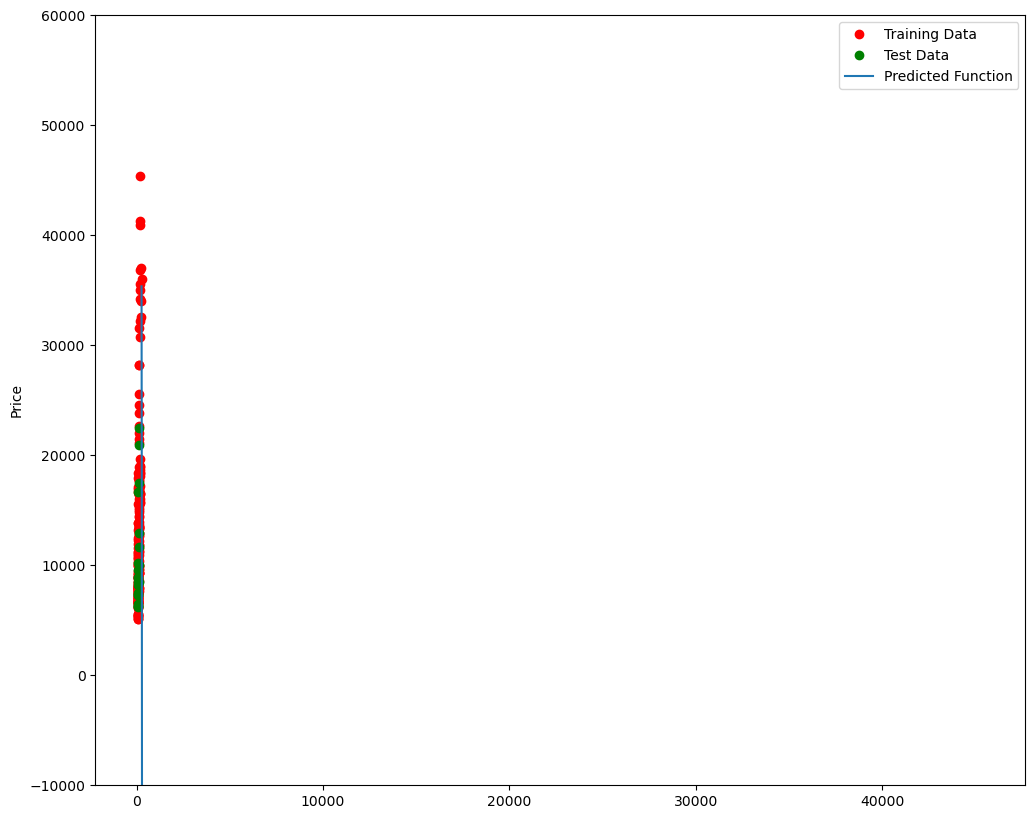

In [74]:
PollyPlot(xtrain['horsepower'],x_test['horsepower'],ytrain,y_test,lrp,pr)

Text(0.5, 1.0, 'R2 Using Test Data')

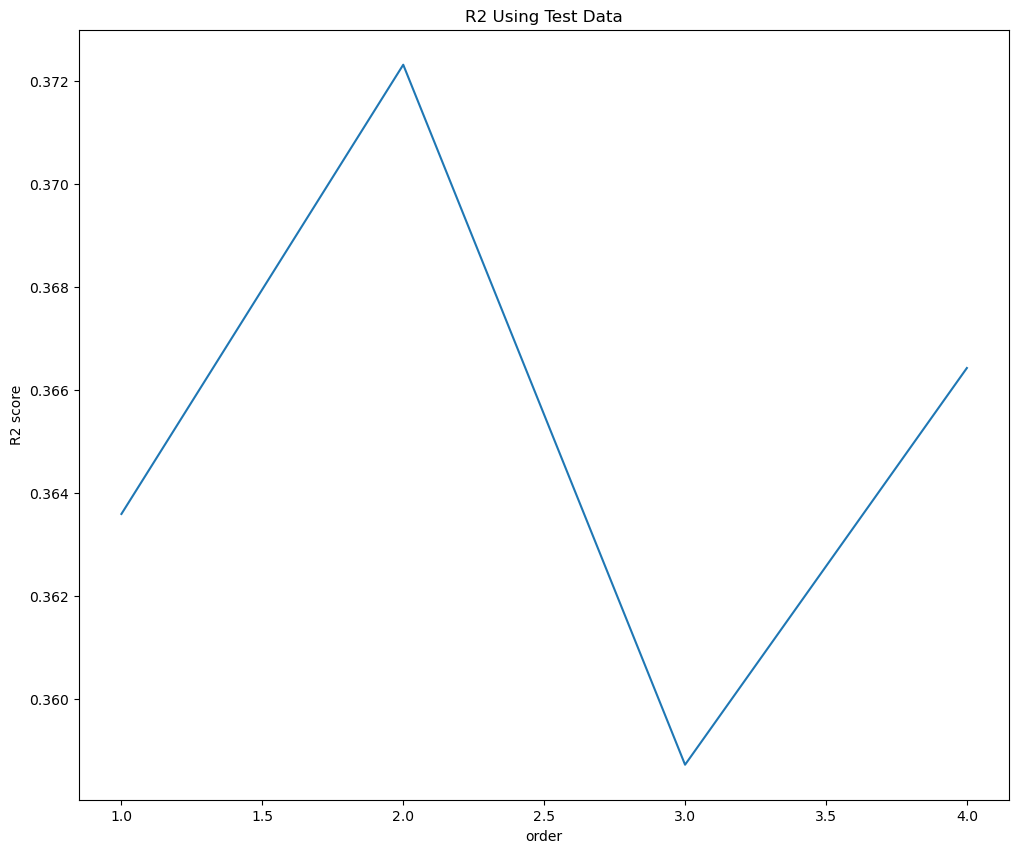

In [87]:
res=[]
order=[1,2,3,4]
for n in order:
    pn=PolynomialFeatures(degree=n)
    xt=pn.fit_transform(xtrain[['horsepower']])
    xts=pn.fit_transform(x_test[['horsepower']])

    l=LinearRegression()
    l.fit(xt,ytrain)
    res.append(l.score(xts,y_test))

plt.figure(figsize=(12,10))
plt.plot(order,res)
plt.xlabel('order')
plt.ylabel('R2 score')
plt.title('R2 Using Test Data')



In [76]:
# overfitting 
lrl=LinearRegression()
lrl.fit(xtrain[['horsepower','curb-weight','engine-size','highway-mpg']],ytrain)

LinearRegression()

In [77]:
yhat_train=lrl.predict(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])

In [78]:
yhat_train[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [81]:
yhat_test=lrl.predict(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])

In [82]:
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

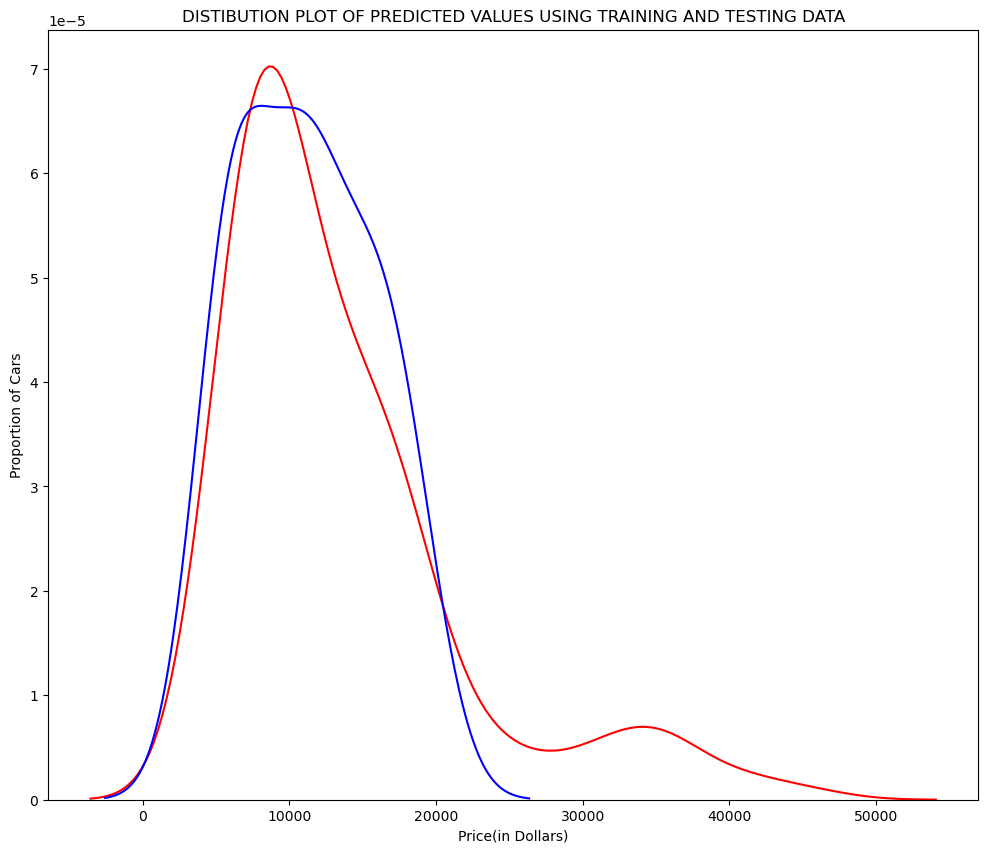

In [83]:
title='DISTIBUTION PLOT OF PREDICTED VALUES USING TRAINING AND TESTING DATA'
DistibutionPlot(ytrain,yhat_train,'Actual Values(Train)','Predicted Values',title)

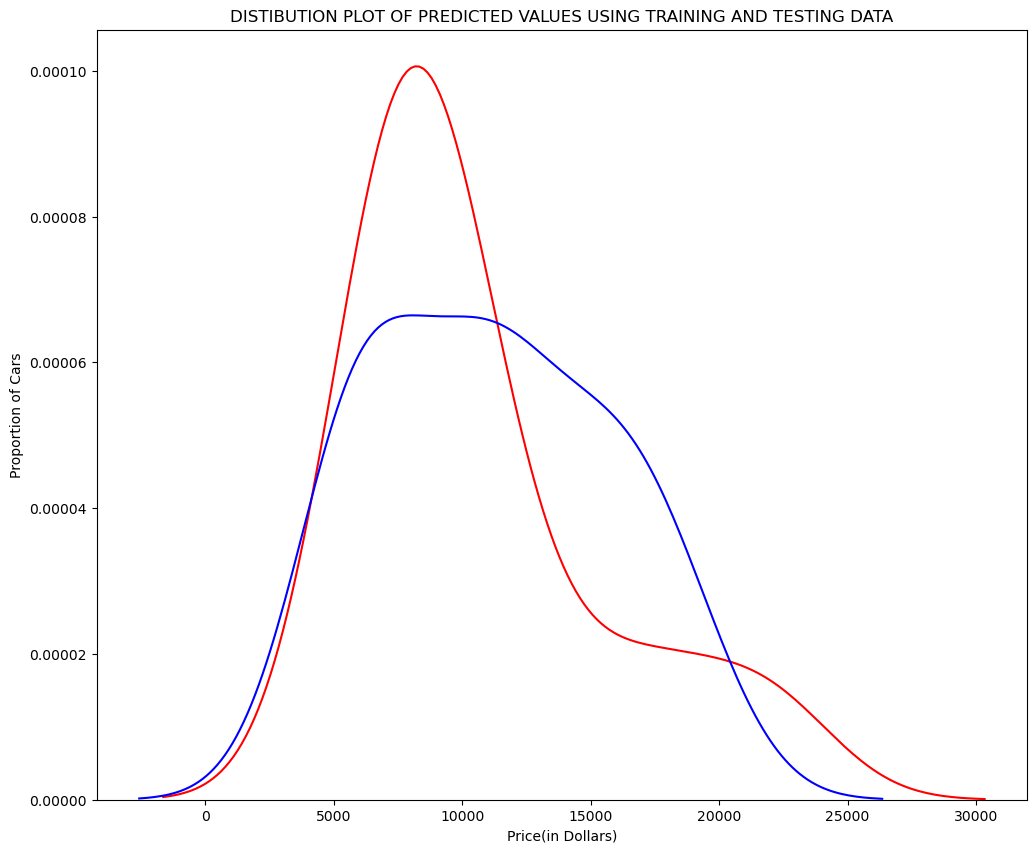

In [84]:
DistibutionPlot(y_test,yhat_test,'Actual Values(Test)','Predicted values',title)

In [88]:
pr1=PolynomialFeatures(2)


In [90]:
xtrainss=pr1.fit_transform(xtrain[['horsepower','curb-weight','engine-size','highway-mpg']])

In [91]:
xtrainss.shape[0]

180

In [92]:
poly1=LinearRegression()


In [93]:
poly1.fit(xtrainss,ytrain)

LinearRegression()

In [94]:
yhatt=poly1.predict(xtrainss)

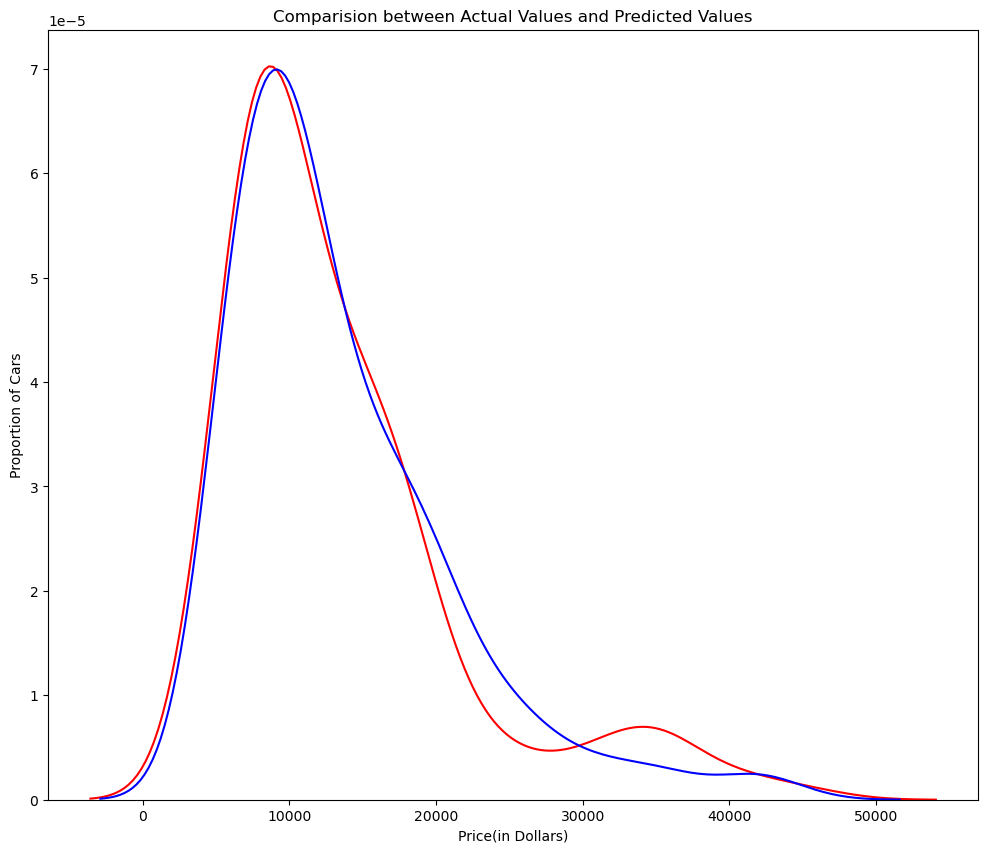

In [96]:
DistibutionPlot(ytrain,yhatt,'Actual Values','Predicted Values','Comparision between Actual Values and Predicted Values')

In [97]:
poly1.score(xtrainss,ytrain)

0.8496095193143075

In [99]:
poly1.score(pr1.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']]),y_test)

0.6944368127033427